In [1]:
import pandas as pd
import numpy as np

#plot

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#register converters

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#setting plot size

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 30,20

#normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

#read data

In [6]:
df = pd.read_excel("05-11-2016-TO-05-11-2019HDFCEQN.xlsx")

#print the head

In [7]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HDFC,EQ,2016-11-07,1386.15,1401.35,1401.95,1373.35,1375.85,1381.40,1382.82,2013931,2.784897e+09,79022,1500983,74.53
1,HDFC,EQ,2016-11-08,1381.40,1381.40,1394.60,1366.10,1393.70,1391.35,1380.73,1611902,2.225601e+09,62991,1102180,68.38
2,HDFC,EQ,2016-11-09,1391.35,1335.55,1362.10,1310.00,1354.50,1350.80,1335.03,4422950,5.904752e+09,85391,2837648,64.16
3,HDFC,EQ,2016-11-10,1350.80,1361.00,1364.55,1311.00,1317.55,1324.55,1336.80,3981742,5.322795e+09,137709,3197168,80.30
4,HDFC,EQ,2016-11-11,1324.55,1310.00,1311.40,1263.25,1266.00,1268.35,1281.08,3340486,4.279434e+09,66901,2367851,70.88


#set index as date

In [8]:
df['Date'] = pd.to_datetime(df.Date, infer_datetime_format=True)
df.index = df['Date']

#plot

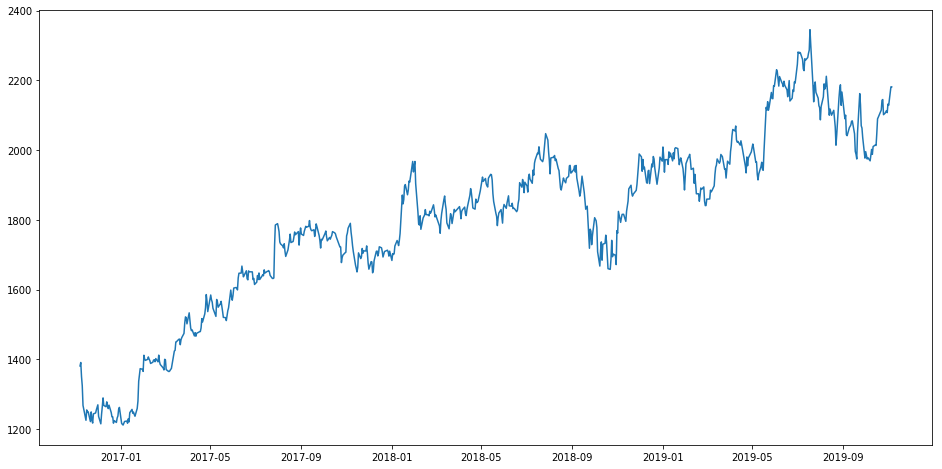

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close Price'], label = 'Close Price History')

In [10]:
from pmdarima import auto_arima

In [69]:
data = df.sort_index(ascending=True, axis=0)

train = data[:700]
valid = data[700:]

In [70]:
training = train['Close Price']
validation = valid['Close Price']

In [91]:
model = auto_arima(training, start_p=1, d=2, start_q=1, max_p=3, max_q=3, m=12, seasonal=True, stationary=False, trace=True, error_action='ignore', suppress_warning=True)
model.fit(training)

Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 0, 1, 12); AIC=6532.142, BIC=6559.431, Fit time=1.912 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=6995.554, BIC=7004.650, Fit time=0.047 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=6814.651, BIC=6832.844, Fit time=0.494 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=6528.066, BIC=6546.259, Fit time=1.355 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 0, 1, 12); AIC=6530.068, BIC=6552.809, Fit time=2.468 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=6526.592, BIC=6540.236, Fit time=0.874 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=6528.519, BIC=6546.712, Fit time=0.974 seconds
Fit ARIMA: order=(0, 2, 2) seasonal_order=(0, 0, 0, 12); AIC=6528.615, BIC=6546.807, Fit time=0.543 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 12); AIC=6527.342, BIC=6550.083, Fit time=0.788 seconds
Fit ARIMA: order=(0, 2, 1) s

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 2, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [92]:
forecast = model.predict(n_periods=40)
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

result

In [89]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close Price'])-np.array(forecast['Prediction'])),2)))
rms

77.54184121964887

plot

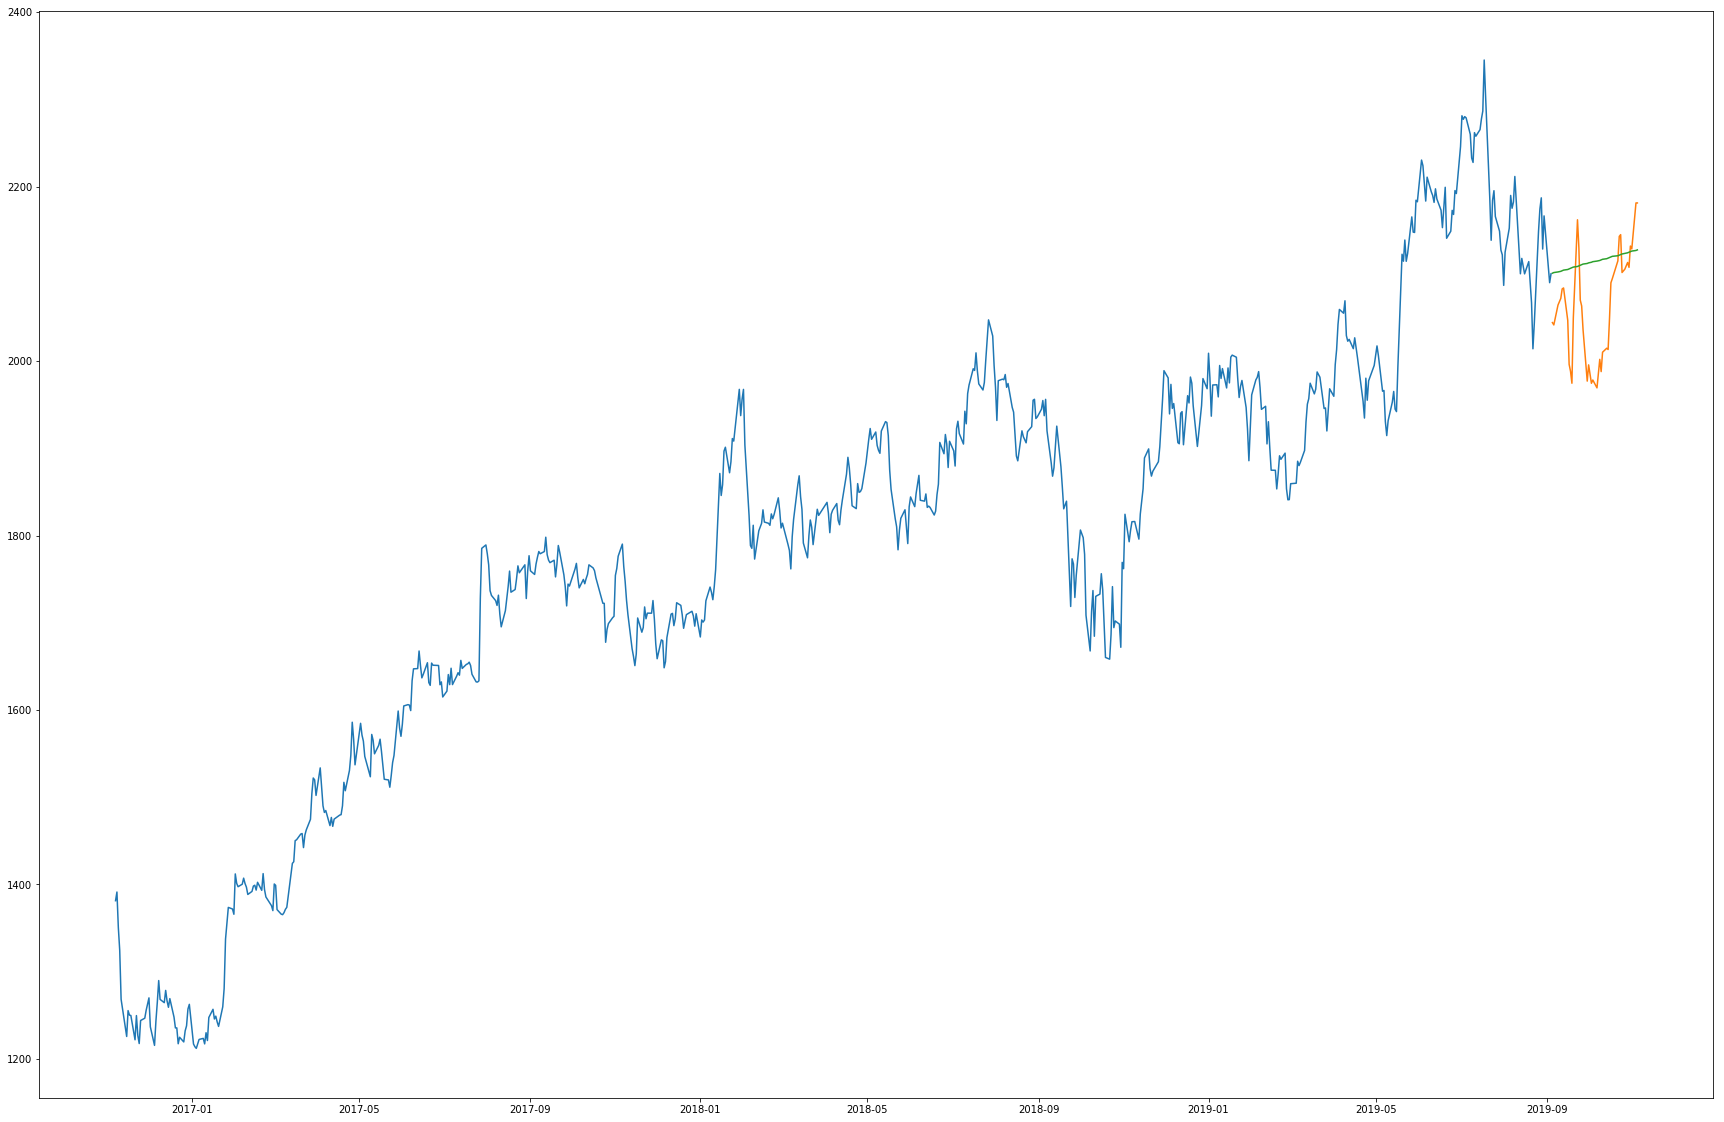

In [90]:
plt.plot(train['Close Price'])
plt.plot(valid['Close Price'])
plt.plot(forecast['Prediction'])